

# Project: Movie Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> I choose Movie dataset to analysis, I am curious about any relationship in Genres and Revenues. And try to figure out something within this dataset.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
df=pd.read_csv('tmdb-movies.csv')
df.head(1)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [3]:
#check values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


A brief discovery:
    1. The min and max values of runtime are strange.
    2. This database is from 1960 to 2015.
    3. Budget and revenue both have 0 value.

Decide which column is useless:

Homepage is useless in this analysis, so I decide to drop this column.
Because "Release_year" is also in the dataset, release_date is not important at all.
Keywords, tagline, and overview are related to the story, I don't think it is necessary to have these.
I want use bugdet and revenue without _adj to analyze, so I will also drop the columns with _adj.
Base on above description, I decide to drop 7 columns.

In [5]:
df.drop(['homepage','release_date','keywords','tagline','overview','production_companies','budget_adj', 'revenue_adj'],axis=1, inplace=True)
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015


In [6]:
#check null column
df.isnull().sum()

id                 0
imdb_id           10
popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
vote_count         0
vote_average       0
release_year       0
dtype: int64

In [7]:
df.shape

(10866, 13)

There are 10866 datas in the data base, I think it is ok to drop under 100 null columns.

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

id                0
imdb_id           0
popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
runtime           0
genres            0
vote_count        0
vote_average      0
release_year      0
dtype: int64

In [10]:
# Check if any duplicate column
df.duplicated().sum()

1

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
df.shape

(10726, 13)

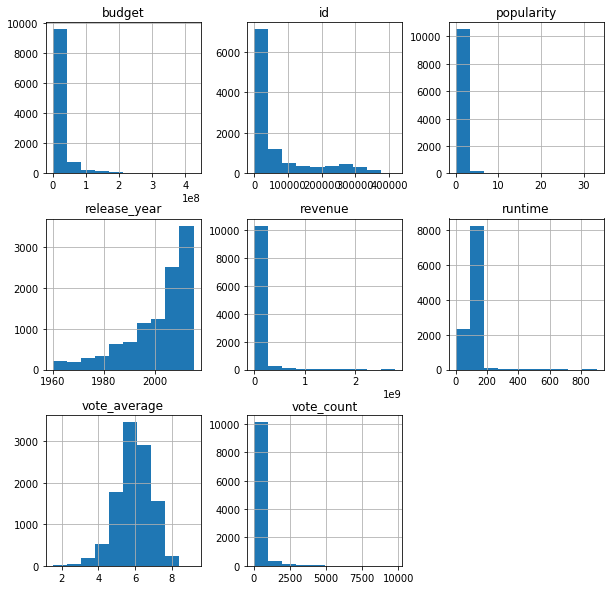

In [14]:
df.hist(figsize=(10,10));

A brief discovery:

1. Lots of 0 in budget and revenue value.
2. Movies release volumns increased by year.

Double check the distribution of budget and revenue with box plot.

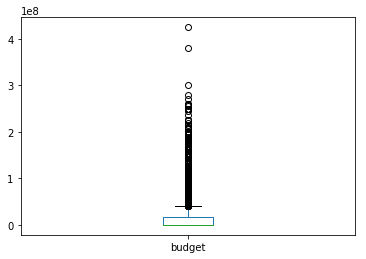

In [15]:
df['budget'].plot(kind='box');

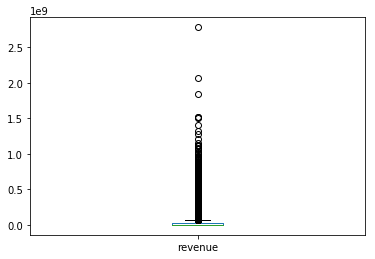

In [16]:
df['revenue'].plot(kind='box');

Base on above two charts, there are too much zero value in both budget and revenue column. I think it is not suitable to replace over 50% values in manual, this might influence the analysis a lot. So I decide to drop them. Firstly, I will drop zero value in revenue due to I would rather to analyze revenue than budget.

## Data Cleanning

In [17]:
# drop revenue with zero value
df_drop_0revenue=df[(True^df['revenue'].isin([0]))]
df_drop_0revenue.shape

(4843, 13)

After dropping, 4843 datas left, I want to check how many zero value left in budget to make sure the data get close to be useable.

In [18]:
df_drop_0revenue.query('budget==0').nunique()

id                994
imdb_id           994
popularity        994
budget              1
revenue           980
original_title    992
cast              992
director          799
runtime            84
genres            372
vote_count        249
vote_average       51
release_year       53
dtype: int64

There still about 20% of the remain data has zero value in budget, but smaller than 50%. So I'll fill these data with mean.

In [19]:
# replace with zero value in budget with mean
df_new = df_drop_0revenue.replace([0],df_drop_0revenue.budget.mean())


In [20]:
#check is there still any zero value in budget
df_new.query('budget==0')

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year


In [51]:
# check new description 
df_new.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,4843.000000,4843.000000,4.843000e+03,4.843000e+03,4843.000000,4843.000000,4843.000000,4843.000000
mean,44552.099112,1.046315,3.567974e+07,8.933981e+07,107.969647,436.794342,6.149060,2000.914516
std,72378.612654,1.357222,3.776152e+07,1.621546e+08,21.107426,806.854055,0.798274,11.571917
min,5.000000,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.100000,1960.000000
25%,8276.000000,0.388227,1.290000e+07,7.779664e+06,95.000000,47.000000,5.600000,1994.000000
50%,12150.000000,0.680803,2.960373e+07,3.191160e+07,104.000000,147.000000,6.200000,2004.000000
75%,43954.000000,1.210533,4.000000e+07,1.000000e+08,117.000000,435.500000,6.700000,2010.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.400000,2015.000000


There is no zero value both in budget and revnue anymore.

Through investigation, I found out that there are three columns have multiple values which separated with "|", so I start to try to handle with this.

In [21]:
df_split= df_new[df_new['cast'].str.contains('|')]

In [22]:
df_split.shape

(4843, 13)

In [23]:
#cleaning data with spilt
split_columns=['cast','genres']

for c in split_columns:
    df_split[c]=df_split[c].apply(lambda x:x.split("|")[0])

Check these three columns only left the first value.

In [24]:
df_split.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year
0,135397,tt0369610,32.985763,150000000.0,1513528810,Jurassic World,Chris Pratt,Colin Trevorrow,124,Action,5562,6.5,2015
1,76341,tt1392190,28.419936,150000000.0,378436354,Mad Max: Fury Road,Tom Hardy,George Miller,120,Action,6185,7.1,2015
2,262500,tt2908446,13.112507,110000000.0,295238201,Insurgent,Shailene Woodley,Robert Schwentke,119,Adventure,2480,6.3,2015
3,140607,tt2488496,11.173104,200000000.0,2068178225,Star Wars: The Force Awakens,Harrison Ford,J.J. Abrams,136,Action,5292,7.5,2015
4,168259,tt2820852,9.335014,190000000.0,1506249360,Furious 7,Vin Diesel,James Wan,137,Action,2947,7.3,2015


<a id='eda'></a>
## Exploratory Data Analysis


### Q1: What is the distribution of genres?

In [25]:
genre_indivdual= df_split.genres.value_counts()
genre_indivdual.head()

Drama        1156
Comedy       1050
Action        825
Adventure     353
Horror        324
Name: genres, dtype: int64

In [26]:
genre_total=df_split.genres.value_counts().sum()
genre_total

4843

In [27]:
genre_prop = genre_indivdual/genre_total
genre_prop.head()

Drama        0.238695
Comedy       0.216808
Action       0.170349
Adventure    0.072889
Horror       0.066901
Name: genres, dtype: float64

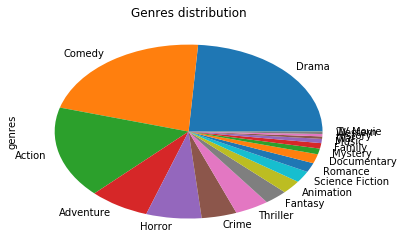

In [28]:
genre_prop.plot(kind='pie');
plt.title('Genres distribution');

Base on pie chart, Drama, Comedy, and Action have most propotion in Genres.
And these three genres are in the majority of over half of the genres.

### Q2: Which genre has more populartiy?

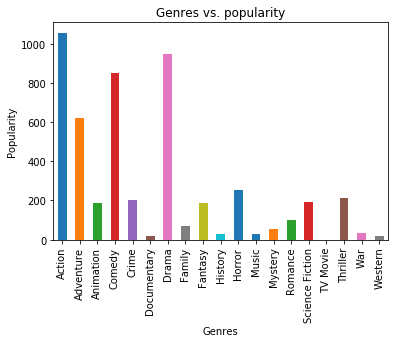

In [29]:
genres_popularity = df_split.groupby('genres').sum().popularity
genres_popularity.plot(kind='bar');
plt.title('Genres vs. popularity');
plt.xlabel('Genres');
plt.ylabel('Popularity');

Drama, Comedy, and Action has most popularity. This makes sense that most movies are produced with these three genres.

### Q3:Which genres makes most revenue?


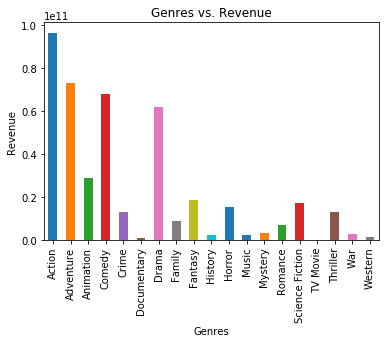

In [30]:
genres_revenue = df_split.groupby('genres').sum().revenue
genres_revenue.plot(kind='bar');
plt.title('Genres vs. Revenue');
plt.xlabel('Genres');
plt.ylabel('Revenue');

Though Action is the third most genres and have most popularity, it also creates the most revenues.
People who loves Action and Adventure are more willing to go to the movie.

<a id='conclusions'></a>
## Conclusions 

Due to lots of missing value in budget and revenue, after cleaning data, only 50% data left. Though I think it might be more accurate than filling missing value with mean, I still have some concern on it. Maybe we can check the data source to see if any missing data we can acquire, or search larger database.

The popularity doesn't have unit, so I just assume all the data is in the same base no matter it is in thousand or million.


An advise for whom wants to produce a movie, Action and Adventure moives are less competitor due to around only 25% of movies belongs to these genres. However, these two genres generate top 2 revenues.

